### 1. Introduction

Diabetes is a chronic health condition that affects how your body turns food into energy. It involves the pancreas not producing enough insulin or the body not using insulin effectively, leading to high levels of glucose in the blood. This imbalance can lead to serious health complications over time, including heart disease, vision loss, and kidney disease. With the advent of big data technologies, healthcare professionals are now better equipped to understand, diagnose, and manage diabetes through the analysis of large datasets. These datasets can reveal patterns, trends, and insights that were previously unattainable, allowing for personalized treatment plans and preventive measures.

---
### 2. Challenges on Big Data

Big data in healthcare, particularly in the study and management of diabetes, presents several challenges. First, the sheer volume of data generated from various sources, including electronic health records, wearables, and medical imaging, can be overwhelming to process and analyze. Second, the variety of data, ranging from structured numeric records to unstructured text notes, requires sophisticated tools and techniques for effective integration and analysis. Third, the velocity at which new data is generated demands real-time processing capabilities to provide timely insights for patient care. Additionally, ensuring the veracity and validity of the data is crucial, as inaccuracies can lead to misdiagnoses and inappropriate treatments. Lastly, maintaining the privacy and security of sensitive patient information is a significant concern, necessitating stringent data protection measures.

---
### 3. Aims/Objective

The primary aim of this study is to utilize the diabetes dataset to develop a predictive model capable of accurately identifying individuals at risk of diabetes based on various health indicators. By analyzing relationships between different health metrics and the occurrence of diabetes, the project seeks to uncover significant predictors of the disease, enabling early intervention and personalized healthcare strategies. Furthermore, this study aims to apply and evaluate various machine learning techniques to determine the most effective model for diabetes prediction. Through these objectives, the project contributes to the broader goals of improving diabetes diagnosis, management, and prevention, thereby enhancing patient outcomes and healthcare efficiency.

---
### 4. Dataset

The dataset for this study encompasses health-related metrics from a significant sample size, aimed at examining the determinants influencing the likelihood of diabetes. It incorporates an array of variables, such as high blood pressure (HighBP), high cholesterol levels (HighChol), cholesterol check frequency (CholCheck), body mass index (BMI), smoking status (Smoker), history of stroke (Stroke), incidents of heart disease or attack (HeartDiseaseorAttack), physical activity (PhysActivity), fruit and vegetable intake (Fruits and Veggies), heavy alcohol consumption (HvyAlcoholConsump), healthcare access (AnyHealthcare), cost-related non-visit to doctor (NoDocbcCost), general health perception (GenHlth), mental health (MentHlth), physical health (PhysHlth), walking difficulty (DiffWalk), sex, age, education level, and income. This dataset is crucial for unearthing patterns and connections among these variables, enhancing our understanding of diabetes risk factors. The insights drawn from this comprehensive dataset can empower healthcare practitioners and researchers to pinpoint high-risk individuals and tailor preventive strategies, potentially paving the way for improved healthcare outcomes and effective diabetes management.

---
### 5. Dataset Variables

- **HighBP**: Indicates if a person has high blood pressure.
- **HighChol**: Indicates if a person has high cholesterol levels.
- **CholCheck**: Indicates if a person has had their cholesterol checked within the last 5 years.
- **BMI**: Body mass index, a key indicator of body fat calculated using height and weight.
- **Smoker**: Indicates if a person is a smoker.
- **Stroke**: Indicates if a person has had a stroke.
- **HeartDiseaseorAttack**: Indicates if a person has had heart disease or an attack.
- **PhysActivity**: Indicates if a person engages in physical activity.
- **Fruits**: Indicates if a person regularly eats fruits.
- **Veggies**: Indicates if a person regularly eats vegetables.
- **HvyAlcoholConsump**: Indicates if a person is a heavy alcohol consumer.
- **AnyHealthcare**: Indicates if a person has healthcare coverage.
- **NoDocbcCost**: Indicates if a person has not seen a doctor due to cost.
- **GenHlth**: A person's general health perception.
- **MentHlth**: Indicates the number of days a person has experienced poor mental health.
- **PhysHlth**: Indicates the number of days a person has experienced poor physical health.
- **DiffWalk**: Indicates if a person has difficulties walking.
- **Sex**: The sex of the person.
- **Age**: The age of the person.
- **Education**: Indicates the level of education of the person.
- **Income**: Indicates the income level of the person.

---
### 6. Importing Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn.metrics import roc_curve, auc
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings("ignore")

---
### 7. Loading and Inspecting the Dataset

In [37]:
# Load the dataset
file_path = 'diabetes_binary.csv'
diabetes_data = pd.read_csv(file_path)

In [38]:
diabetes_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [39]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [40]:
diabetes_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Upon initial inspection, the dataset is fully populated without any apparent missing values. Descriptive statistics reveal:

- Some variables have varying ranges and distributions, suggesting the need for normalization or standardization before modeling.
- The `Diabetes_binary` variable is binary, indicating whether the patient has diabetes (1) or not (0).

---
### 8. Exploratory Data Analysis (EDA)

#### a. Data Cleaning

In [41]:
# Check for missing values in the dataset
missing_values = diabetes_data.isnull().sum()

missing_values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No missing value is found, so no need for data cleaning.

#### b. Outlier Detection

In [42]:
# b. Outlier Detection using IQR
Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((diabetes_data < lower_bound) | (diabetes_data > upper_bound)).any(axis=1)
outlier_indices = diabetes_data[outliers].index

# Count of outliers
outlier_count = outliers.sum()

outlier_count, outlier_indices

(40205,
 Index([    0,     1,     5,     6,    10,    13,    14,    15,    19,    21,
        ...
        70677, 70679, 70680, 70682, 70684, 70686, 70688, 70689, 70690, 70691],
       dtype='int64', length=40205))

The outlier detection process, utilizing the Interquartile Range (IQR) method, has identified a total of 40,205 entries as outliers. These outliers are found across various columns and span a wide range of indices within the dataset. The indices of these outliers start from the very beginning of the dataset and extend to its end, specifically mentioned indices include 0, 1, 5, 6, 10, 13, 14, 15, 19, 21, ..., 70677, 70679, 70680, 70682, 70684, 70686, 70688, 70689, 70690, 70691. This substantial number of outliers indicates a significant proportion of the data deviates from the central tendency, which may have implications for data analysis and modeling efforts

#### c. Feature Selection and g. Correlation Analysis

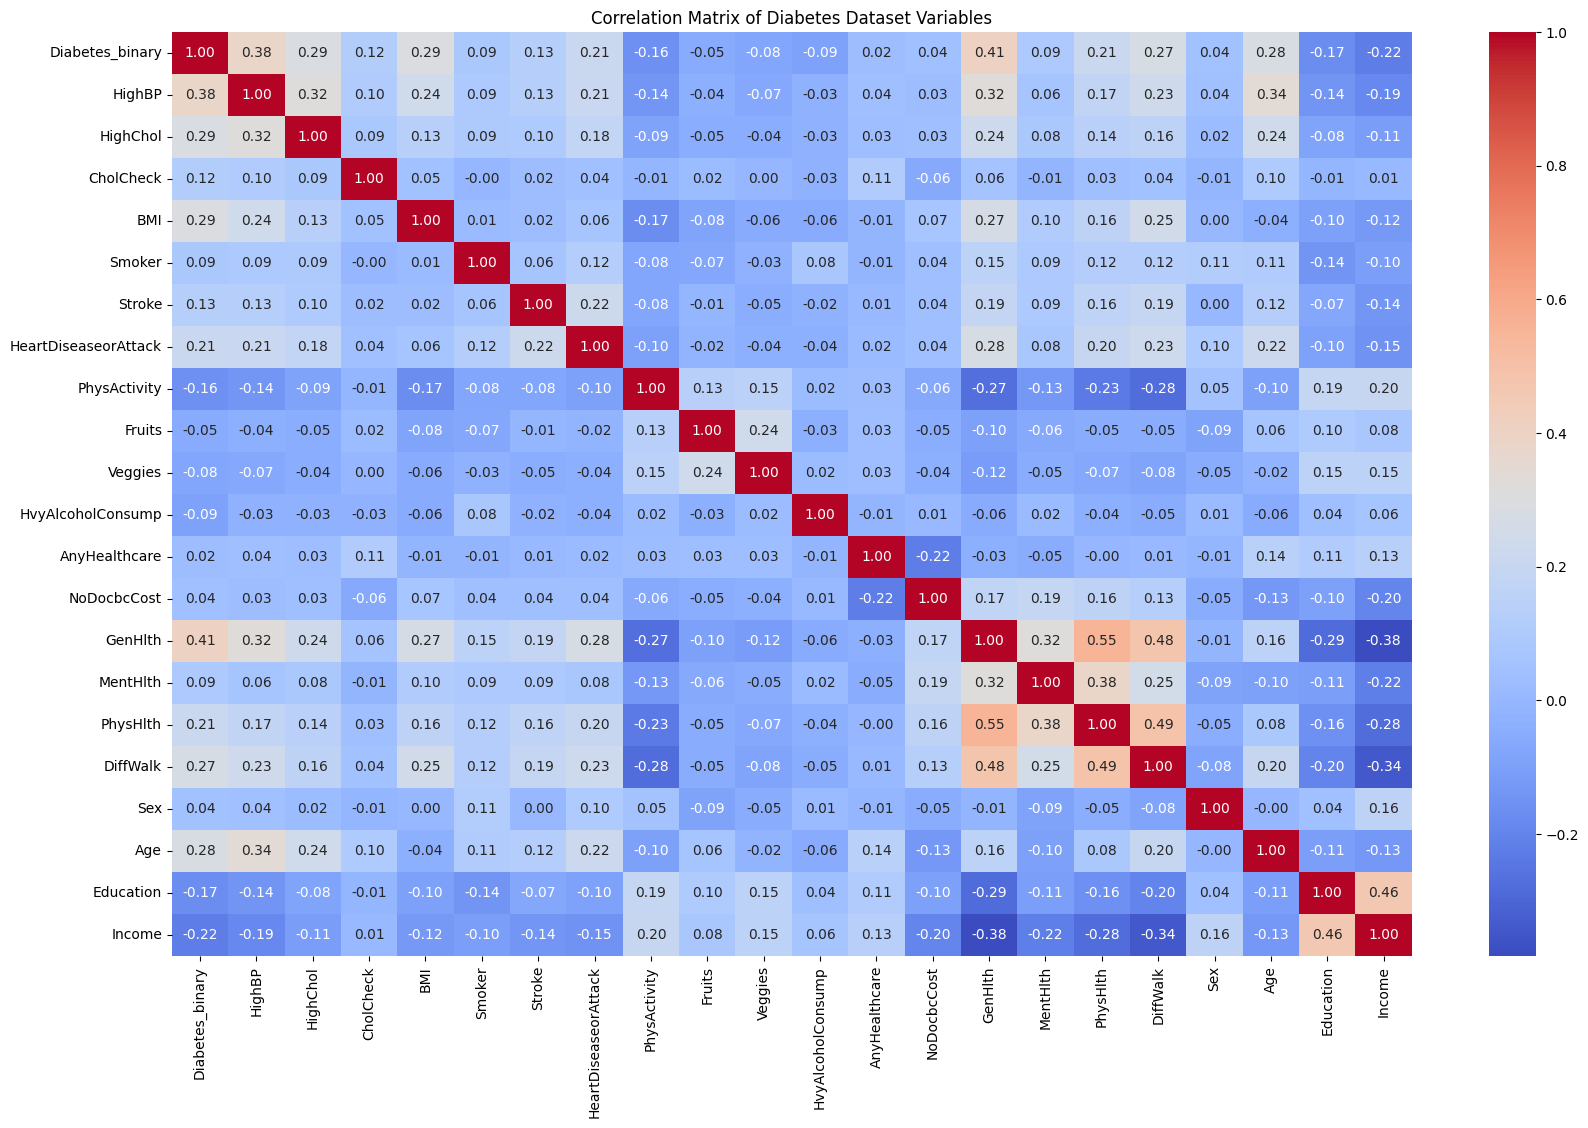

In [15]:
# c. Feature Selection - Starting with Correlation Analysis
correlation_matrix = diabetes_data.corr()

# Plotting the heatmap for correlation analysis
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset Variables')
plt.show()

The heatmap represents a correlation matrix of variables from a diabetes dataset, visualizing the strength and direction of relationships between different health-related factors. A key insight from this matrix is the strong positive correlation between 'GenHlth' (General Health) and 'PhysHlth' (Physical Health), as well as 'MentHlth' (Mental Health), suggesting that individuals' perceptions of their general health are closely linked to their physical and mental health statuses. Additionally, 'Age' shows a positive correlation with 'HighBP' (High Blood Pressure) and 'HighChol' (High Cholesterol), indicating a tendency for these conditions to be more prevalent as age increases. On the contrary, 'PhysActivity' (Physical Activity) is negatively correlated with 'Diabetes_binary', 'HighBP', and 'GenHlth', which implies that higher levels of physical activity are associated with a lower prevalence of diabetes, lower blood pressure, and better general health. The matrix also shows several variables with very low to no correlation, such as 'CholCheck' with many other factors, suggesting that cholesterol checking frequency is independent of most variables considered in this study. This kind of visualization aids in identifying potential risk factors and protective factors related to diabetes, which can be critical for predictive modeling and public health interventions.

#### d. Feature Engineering

In [43]:
# Create a new feature by multiplying 'BMI' and 'Age'
diabetes_data['BMI_Age_Interaction'] = diabetes_data['BMI'] * diabetes_data['Age']

# Display the first few rows of the dataset to verify the new feature
diabetes_data[['BMI', 'Age', 'BMI_Age_Interaction']].head()

,BMI,Age,BMI_Age_Interaction
0,26.0,4.0,104.0
1,26.0,12.0,312.0
2,26.0,13.0,338.0
3,28.0,11.0,308.0
4,29.0,8.0,232.0


The interaction between 'BMI' and 'Age' could be significant in predicting diabetes, as both higher BMI and older age have been individually associated with increased risk. By multiplying these two variables together, we create an interaction term that may capture the combined effect of these risk factors more effectively than considering them separately.

#### e. Data Exploration and h. Visualization of Distribution of Each Feature

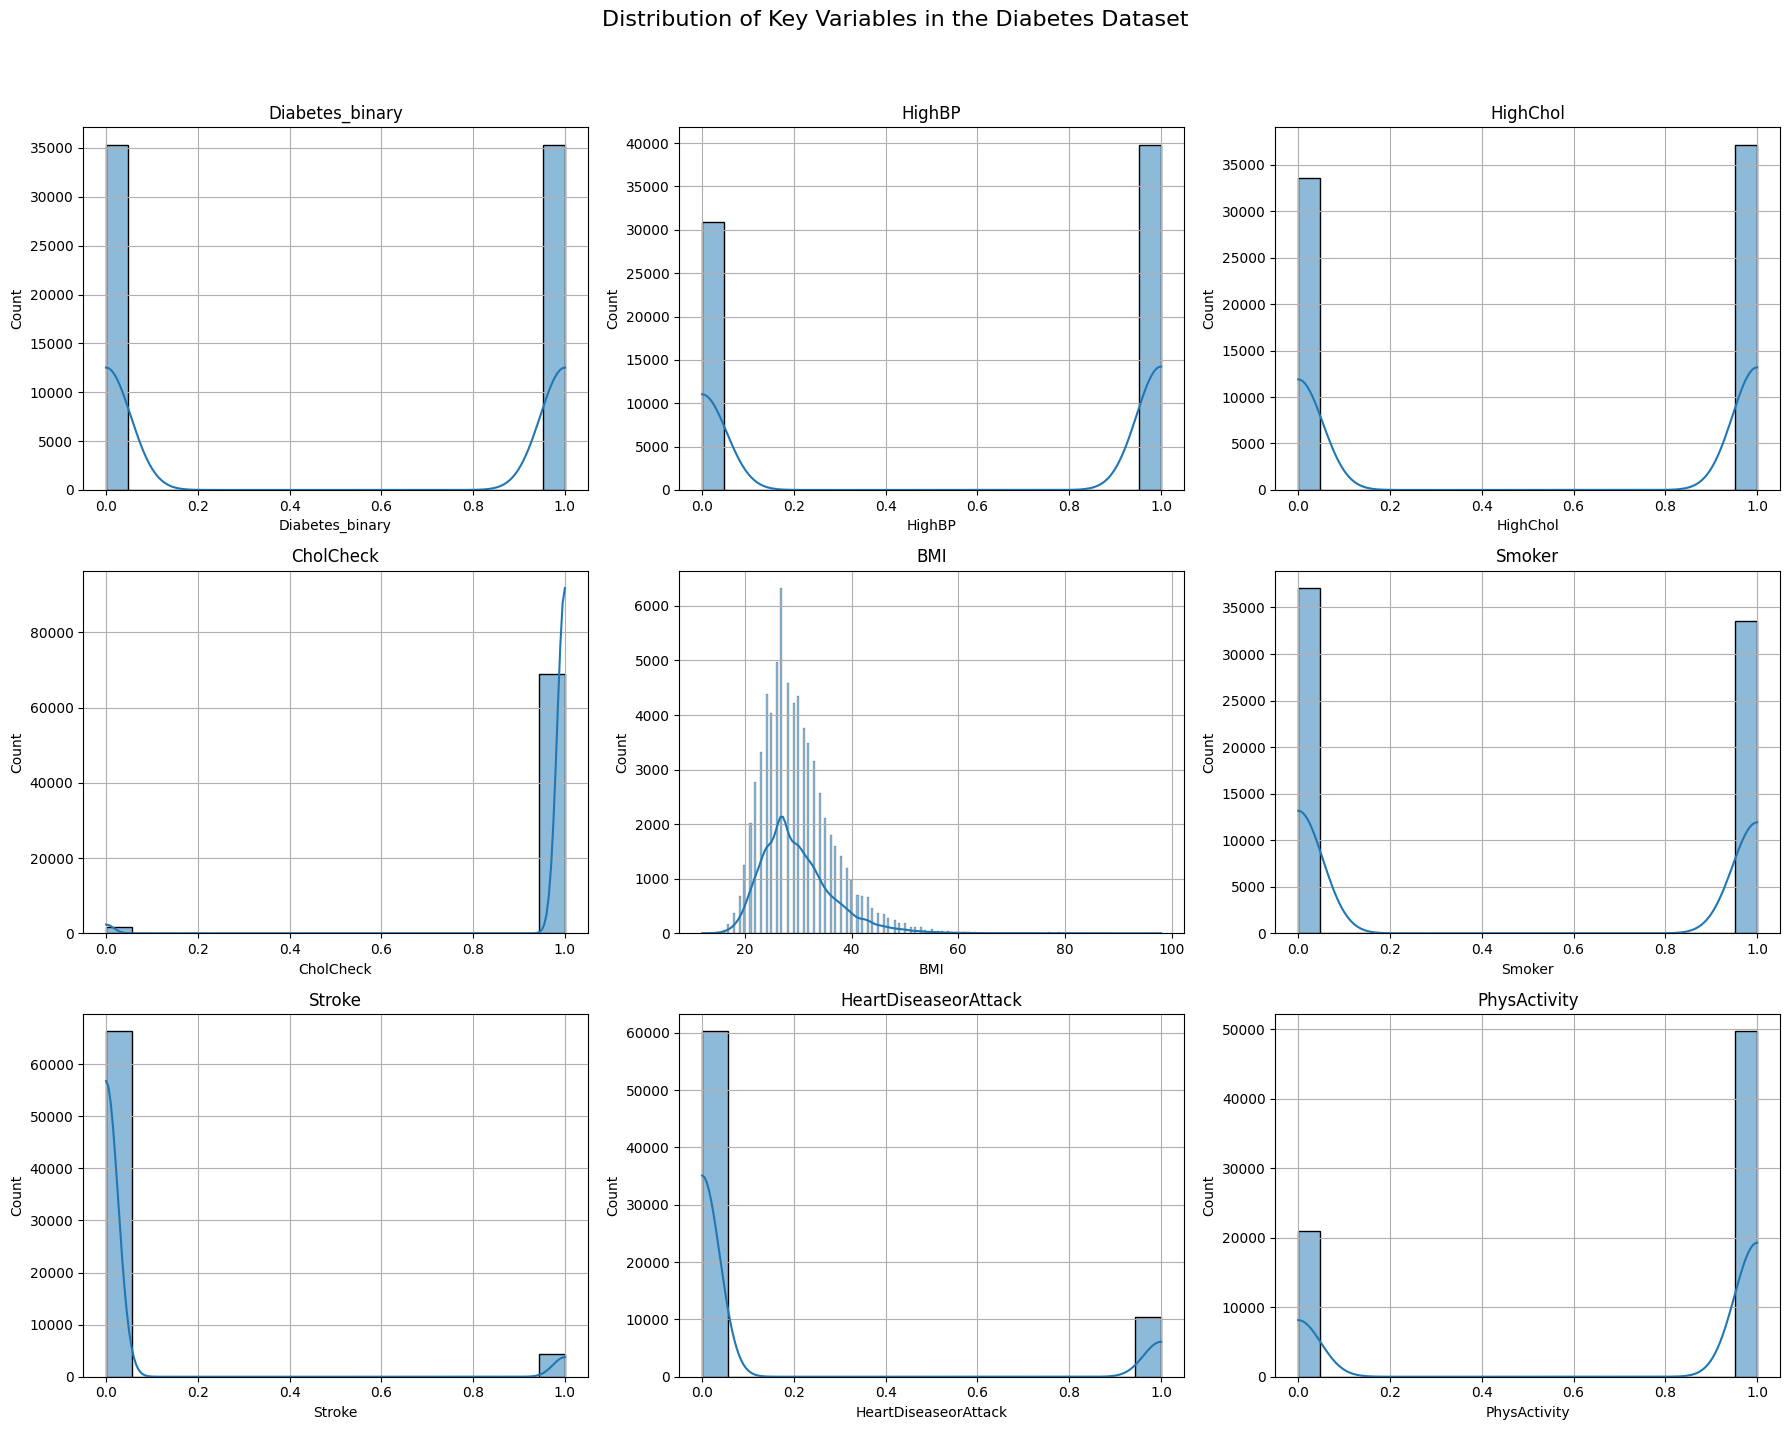

In [18]:
# e. Data Exploration - Visualizing the distribution of key variables

# Setting up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Distribution of Key Variables in the Diabetes Dataset', fontsize=16)

# List of columns for plotting
columns = diabetes_data.columns[:-1]  # Excluding the 'Outcome' column

# Plotting histograms for each variable
for ax, column in zip(axes.flatten(), columns):
    sns.histplot(diabetes_data[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to make room for the main title
plt.show()

**Insight**

- **Diabetes_binary**: The distribution is bimodal and balanced, indicating the dataset likely has an equal number of cases with and without diabetes, as this appears to be a binary outcome variable.
- **HighBP**: The data for high blood pressure is somewhat evenly distributed but with a slightly greater number of individuals without high blood pressure.
- **HighChol**: Similar to HighBP, the distribution for high cholesterol levels is fairly balanced with a small prevalence towards individuals without high cholesterol.
- **CholCheck**: The majority of individuals have had their cholesterol checked, suggesting regular health screenings among the dataset's population.
- **BMI**: The BMI values follow a right-skewed distribution, with most individuals having a BMI in the normal to moderately overweight range, but with some extreme values indicating obesity.
- **Smoker**: There are fewer smokers than non-smokers in the dataset, showing a lower prevalence of smoking in the population sampled.
- **Stroke**: The vast majority of individuals have not experienced a stroke, which is a rare but significant health event.
- **HeartDiseaseorAttack**: Similar to stroke, a large proportion of the dataset's population has not had a heart disease or attack, indicating these are less common occurrences.
- **PhysActivity**: A large number of individuals engage in physical activity, as shown by the significant number of counts towards the higher end of the distribution.

Each plot is accompanied by a kernel density estimation (KDE) line that gives a smooth estimate of the distribution.

#### f. Pair Plots and Bar Plots

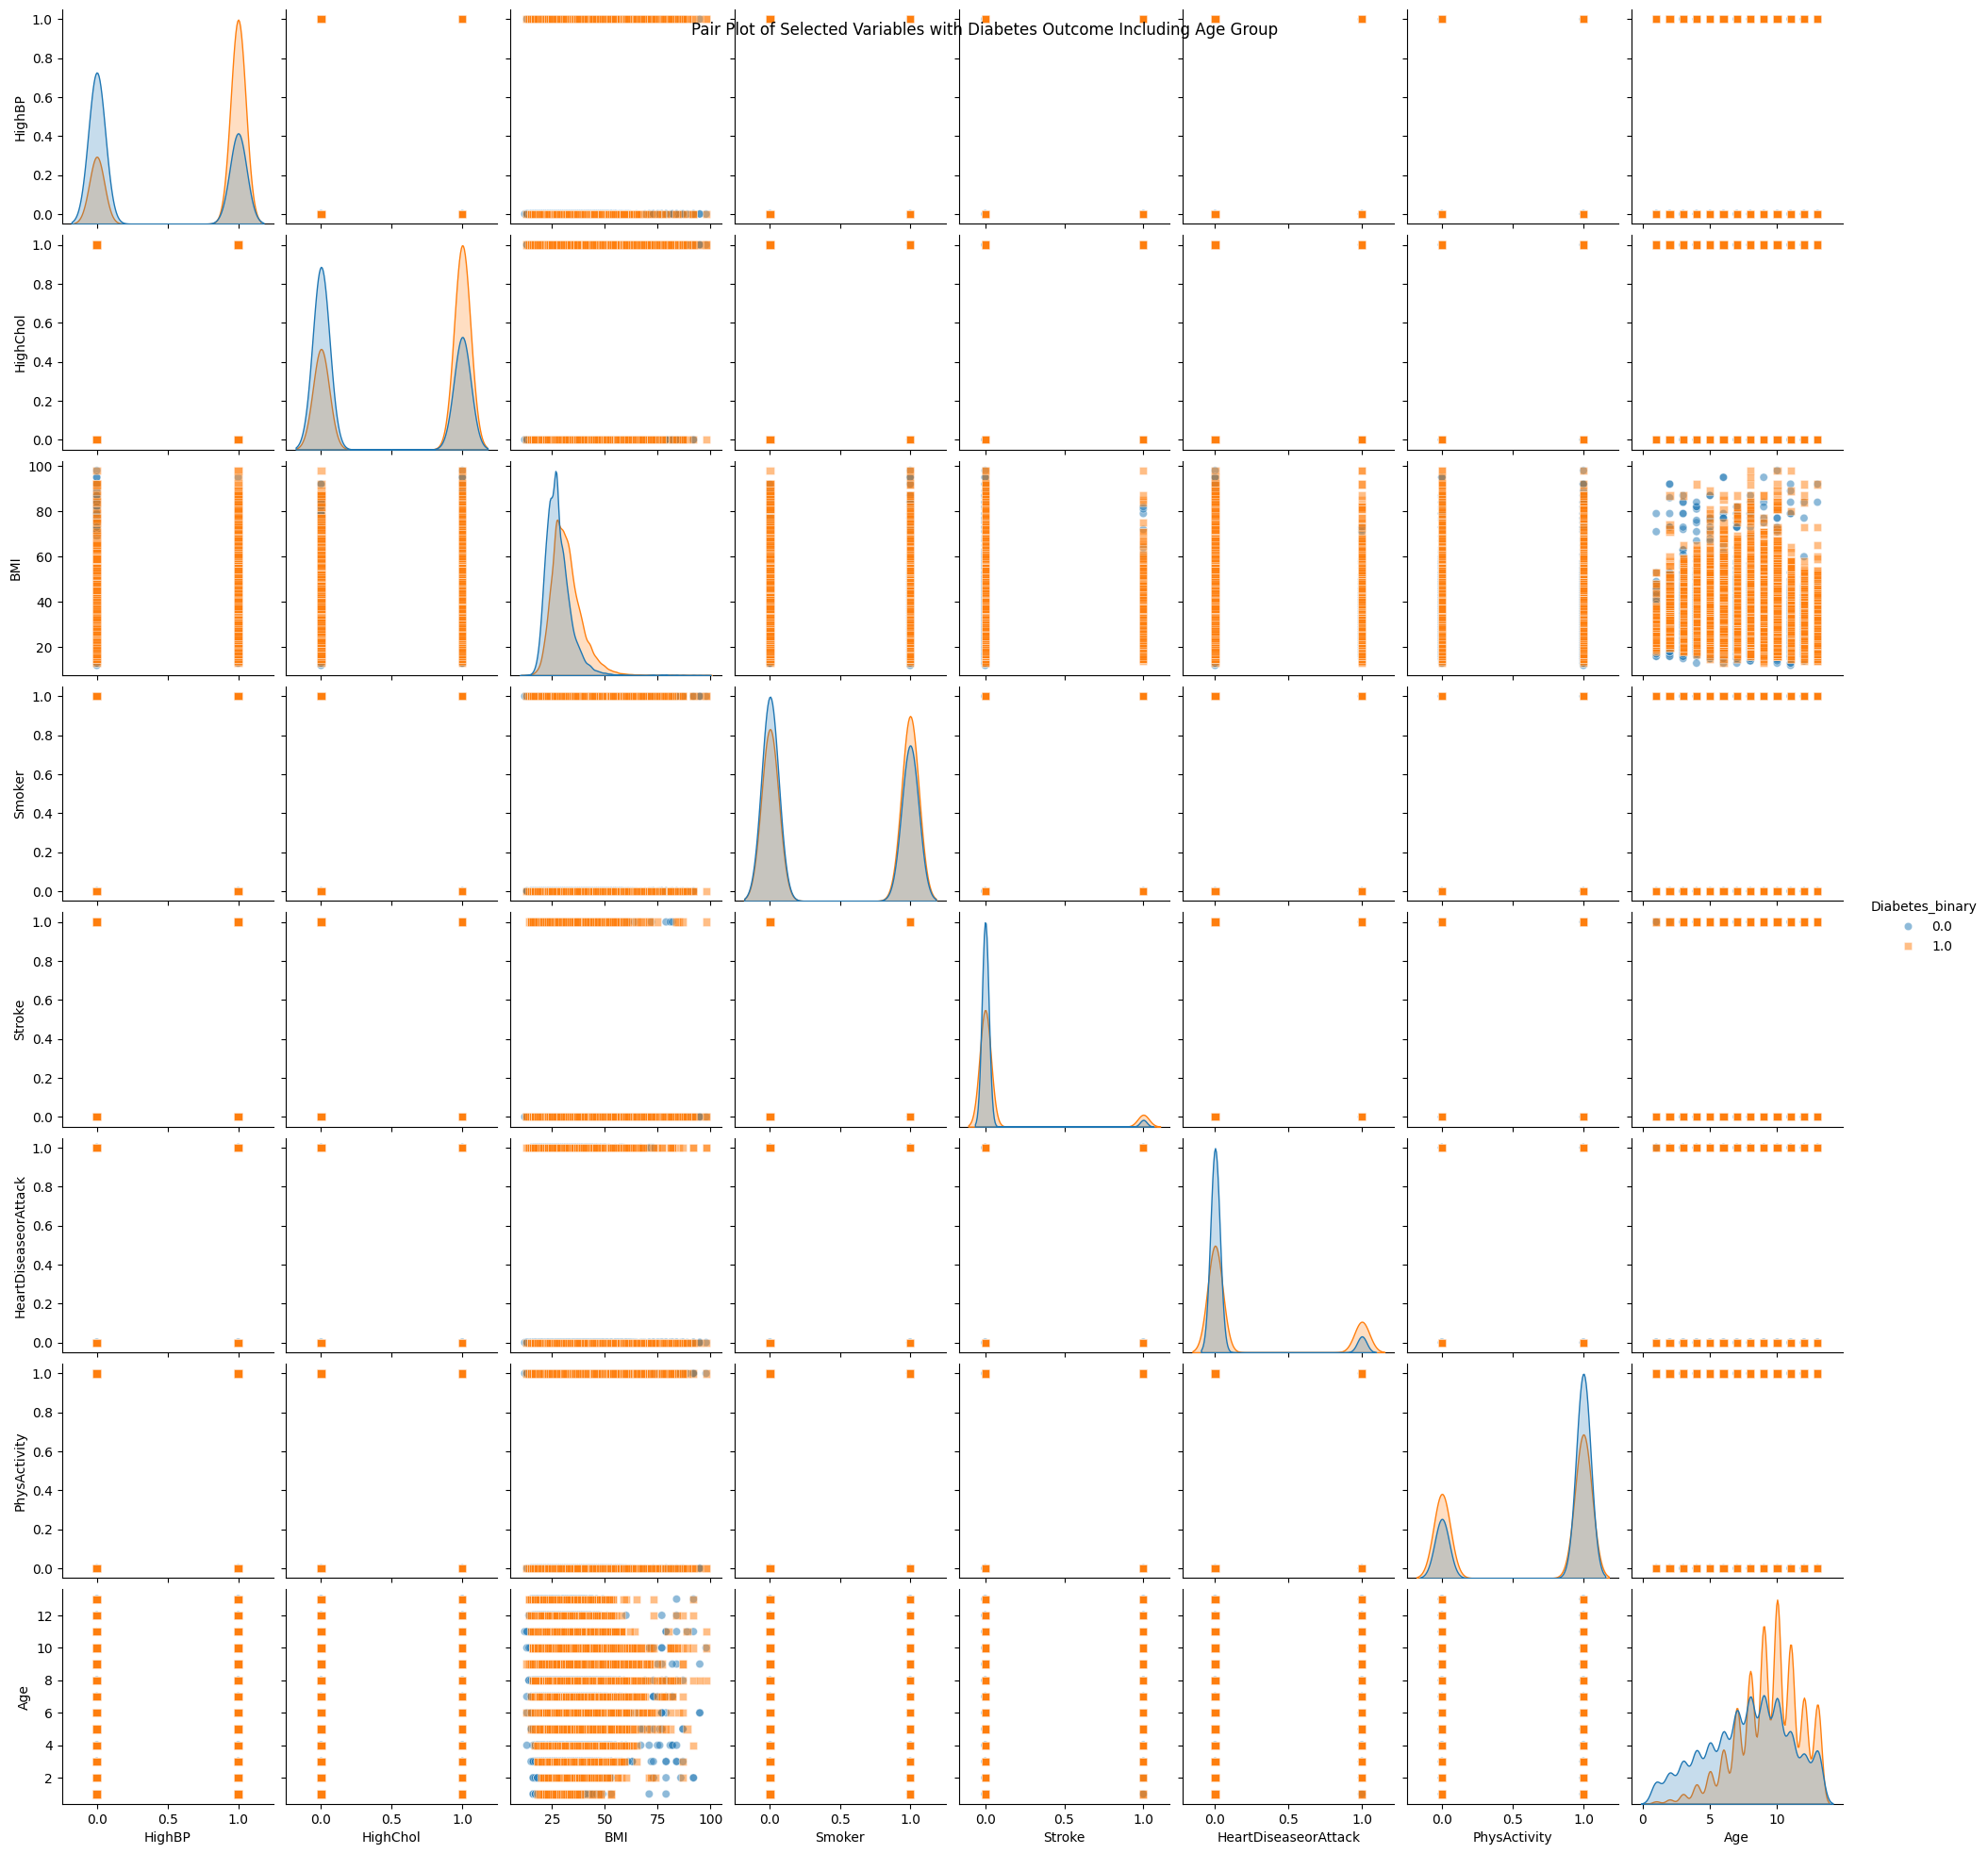

In [19]:
# f. Pair Plots and Bar Plots
sns.pairplot(diabetes_data[['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Age']], hue='Diabetes_binary', plot_kws={'alpha': 0.5}, markers=["o", "s"])
plt.suptitle('Pair Plot of Selected Variables with Diabetes Outcome', size=12)
plt.show()

#### i. Other Visuals

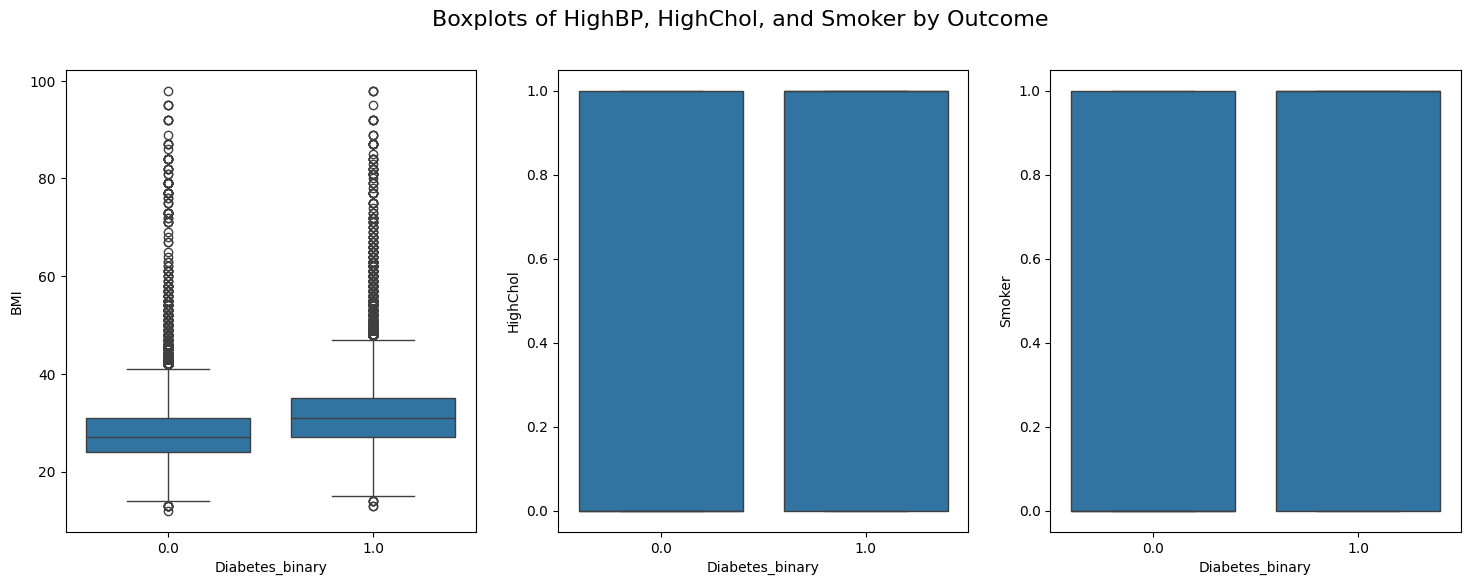

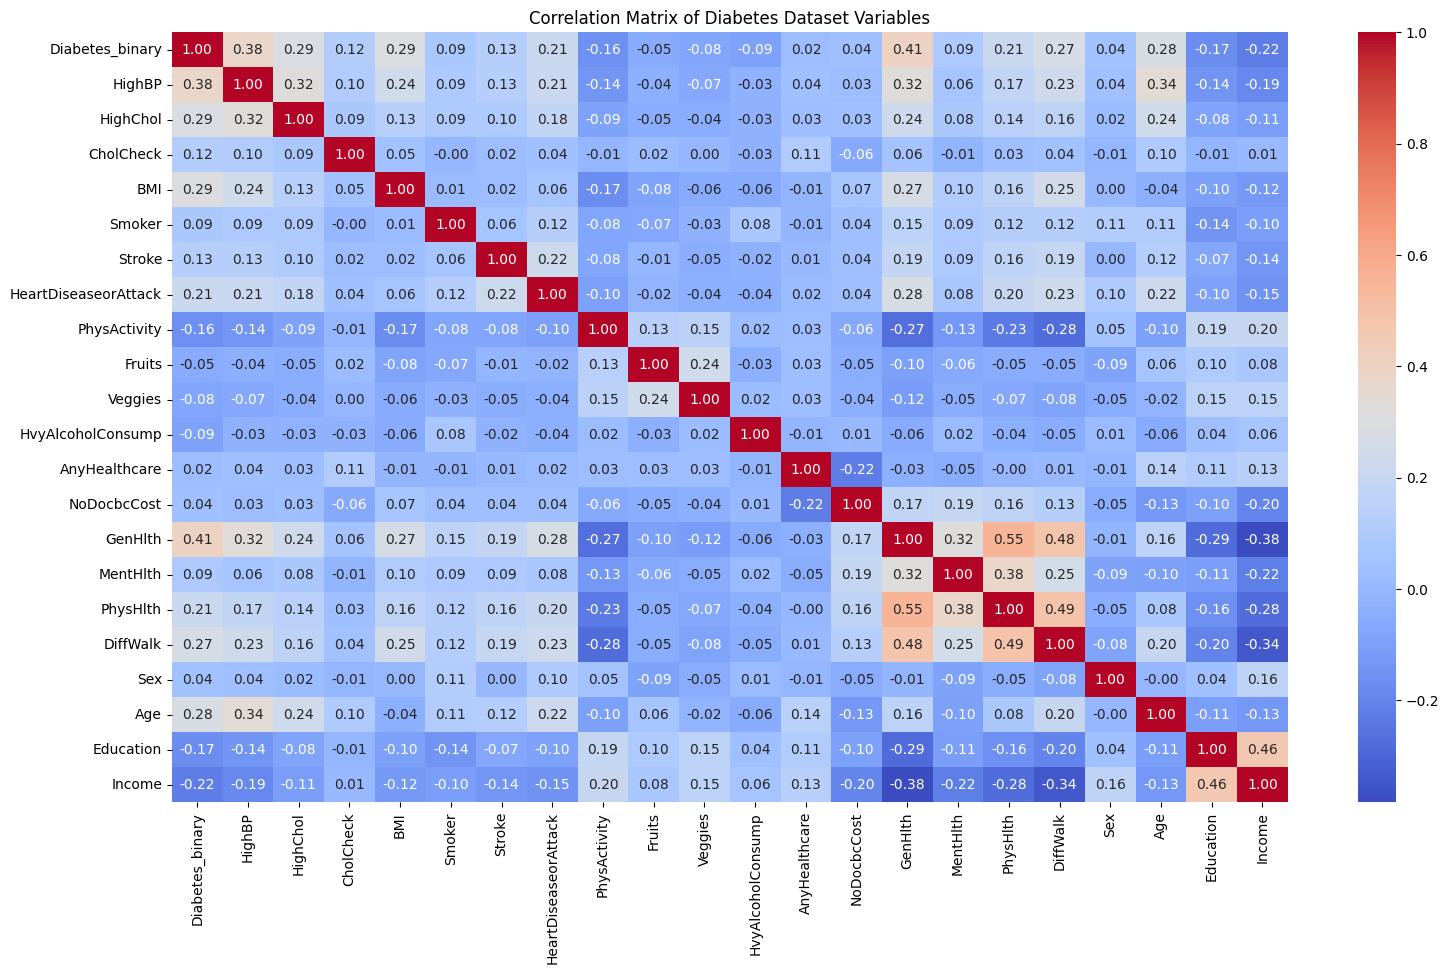

In [25]:
# 1. Boxplots for selected variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=diabetes_data, ax=axes[0])
sns.boxplot(x='Diabetes_binary', y='HighChol', data=diabetes_data, ax=axes[1])
sns.boxplot(x='Diabetes_binary', y='Smoker', data=diabetes_data, ax=axes[2])
fig.suptitle('Boxplots of HighBP, HighChol, and Smoker by Outcome', fontsize=16)

# 2. Heatmap of the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset Variables')

plt.show()

#### j. Skewness

In [26]:
# j. Skewness - Evaluating skewness of each variable
numeric_columns = diabetes_data.select_dtypes(include=['number']).columns
skewness = diabetes_data[numeric_columns].drop('Diabetes_binary', axis=1).skew().sort_values(ascending=False)
skewness

HvyAlcoholConsump       4.522548
Stroke                  3.626499
NoDocbcCost             2.784235
MentHlth                2.388110
HeartDiseaseorAttack    1.984703
BMI                     1.719180
PhysHlth                1.657304
DiffWalk                1.138002
BMI_Age_Interaction     0.221433
Sex                     0.172657
GenHlth                 0.171991
Smoker                  0.099031
HighChol               -0.102950
HighBP                 -0.255908
Fruits                 -0.458804
Age                    -0.545923
Income                 -0.645073
Education              -0.681621
PhysActivity           -0.888732
Veggies                -1.414969
AnyHealthcare          -4.387510
CholCheck              -6.119271
dtype: float64

After analyzing the skewness of each numeric variable in your dataset, we observe the following characteristics:

- **HvyAlcoholConsump**: 4.52, which indicates a highly right-skewed distribution, meaning there are more non-heavy drinkers with a rare occurrence of heavy drinkers.
- **Stroke**: 3.63, also suggesting a right skew, with fewer individuals having experienced a stroke.
- **NoDocbcCost**: 2.78, right-skewed, indicating that most people do not report cost as a barrier to seeing a doctor, but a few do.
- **MentHlth**: 2.39, showing a right skew, where most individuals report fewer mental health issues, with fewer reporting more days of poor mental health.
- **HeartDiseaseorAttack**: 1.98, moderately right-skewed, with the majority not experiencing these conditions.
- **BMI**: 1.72, indicating a moderate right skew with a tail towards higher BMI values.
- **PhysHlth**: 1.66, moderately right-skewed, with most individuals reporting better physical health, but with a long tail indicating some individuals have poor physical health.
- **DiffWalk**: 1.14, showing a moderate right skew, suggesting that most people do not have difficulty walking.
- **BMI_Age_Interaction**: 0.22, indicating a distribution that is nearly symmetric, with a slight push towards younger ages and/or lower BMI.
- **Sex**: 0.17, almost symmetrical, suggesting a nearly balanced distribution between the genders.
- **GenHlth**: 0.17, nearly symmetric distribution indicating general health perception is evenly distributed across the surveyed individuals.
- **Smoker**: 0.10, indicating a very slight right skew, with fewer smokers than non-smokers.
- **HighChol**: -0.10, showing a very slight left skew, with a balance in the number of individuals with high cholesterol.
- **HighBP**: -0.26, slightly left-skewed, suggesting a slight majority have high blood pressure.
- **Fruits**: -0.46, left-skewed, which means more individuals are consuming fruits.
- **Age**: -0.55, indicating a left skew with more younger individuals in the dataset.
- **Income**: -0.65, left-skewed, with more individuals towards the higher income brackets.
- **Education**: -0.68, also left-skewed, suggesting a higher number of individuals with greater educational attainment.
- **PhysActivity**: -0.89, indicating a significant left skewness, with most individuals being physically active.
- **Veggies**: -1.41, showing a pronounced left skew, with a majority reporting they consume vegetables.
- **AnyHealthcare**: -4.39, highly left-skewed, indicating that almost all individuals have some form of healthcare.
- **CholCheck**: -6.12, extremely left-skewed, suggesting that nearly everyone has had their cholesterol checked.

---
### 9. Data Model and Visualization

In [44]:
# Preparing the dataset
X = diabetes_data.drop(['Diabetes_binary', 'BMI_Age_Interaction'], axis=1)
y = diabetes_data['Diabetes_binary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Applying standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Confirming the split
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((56553, 21), (14139, 21), (56553,), (14139,))

#### a. Logistic Regression 

In [48]:
# Fitting a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [49]:
# Predicting on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [50]:
# Evaluating the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

In [51]:
print("Accuracy: ", accuracy_log_reg)
print()
print("Confusion Matrix: ", conf_matrix_log_reg)
print()
print("Report: ", class_report_log_reg)

Accuracy:  0.7484263384963576

Confusion Matrix:  [[5156 1934]
 [1623 5426]]

Report:                precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



The logistic regression model achieved an accuracy of approximately 74.84% on the test set. The confusion matrix and classification report provide further insights into the model's performance:

- **Confusion Matrix**:

    - True Negatives: 5156
    - False Positives: 1934
    - False Negatives: 1623
    - True Positives: 5426
      
- **Classification Report**:

    - Precision for non-diabetic predictions is 0.76, and for diabetic predictions, it's 0.74, indicating a higher reliability in predicting non-diabetic cases.
    - Recall (or sensitivity) for non-diabetic cases is 0.73, and for diabetic cases, it's 0.77, showing the model is slightly better at identifying true non-diabetic instances than diabetic ones.
    - The F1-score, which is a balance between precision and recall, is 0.74 for non-diabetic and 0.75 for diabetic predictions, reflecting the overall effectiveness of the model in handling both classes.

#### b. Decision Tree

In [52]:
# Fitting a Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
# Predicting on the test set
y_pred_dec_tree = dec_tree.predict(X_test_scaled)

In [54]:
# Evaluating the model
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
conf_matrix_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)
class_report_dec_tree = classification_report(y_test, y_pred_dec_tree)

In [55]:
print("Accuracy: ", accuracy_dec_tree)
print()
print("Confusion Matrix: ", conf_matrix_dec_tree)
print()
print("Report: ", class_report_dec_tree)

Accuracy:  0.6492679821769574

Confusion Matrix:  [[4619 2471]
 [2488 4561]]

Report:                precision    recall  f1-score   support

         0.0       0.65      0.65      0.65      7090
         1.0       0.65      0.65      0.65      7049

    accuracy                           0.65     14139
   macro avg       0.65      0.65      0.65     14139
weighted avg       0.65      0.65      0.65     14139



The decision tree model achieved an accuracy of approximately 64.92% on the test set. The evaluation details are as follows:

- **Confusion Matrix**:

    - True Negatives: 4619
    - False Positives: 2471
    - False Negatives: 2488
    - True Positives: 4561

- **Classification Report**:

    - Precision for non-diabetic predictions is 0.65, and for diabetic predictions, it's 0.65.
    - Recall for non-diabetic cases is 0.65, and for diabetic cases, it's 0.65.
    - The F1-score is 0.65 for non-diabetic and 0.65 for diabetic predictions.

Compared to logistic regression, the decision tree model shows a slightly lower accuracy and a different balance in precision and recall, potentially due to its ability to capture more complex patterns in the data but at the risk of overfitting.

#### c. Random Forest

In [56]:
# Fitting a Random Forest model
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Predicting on the test set
y_pred_rand_forest = rand_forest.predict(X_test_scaled)

In [58]:
# Evaluating the model
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
conf_matrix_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
class_report_rand_forest = classification_report(y_test, y_pred_rand_forest)

In [59]:
print("Accuracy: ", accuracy_rand_forest)
print()
print("Confusion Matrix: ", conf_matrix_rand_forest)
print()
print("Report: ", class_report_rand_forest)

Accuracy:  0.7380295636183606

Confusion Matrix:  [[4925 2165]
 [1539 5510]]

Report:                precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



The Random Forest model achieved an accuracy of approximately 73.80% on the test set, with the following evaluation metrics:

- **Confusion Matrix**:

    - True Negatives: 4925
    - False Positives: 2165
    - False Negatives: 1539
    - True Positives: 5510

- **Classification Report**:

    - Precision for non-diabetic predictions is 0.76, and for diabetic predictions, it's 0.72.
    - Recall for non-diabetic cases is 0.69, and for diabetic cases, it's 0.78.
    - The F1-score is 0.73 for non-diabetic and 0.75 for diabetic predictions.

The Random Forest model shows a balance between accuracy, precision, and recall, outperforming the decision tree model and being competitive with the logistic regression model, likely due to its ensemble approach reducing overfitting and improving generalization.

#### d. SVR

In [60]:
# Fitting a Support Vector Classifier model
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [61]:
# Predicting on the test set
y_pred_svc = svc_model.predict(X_test_scaled)

In [62]:
# Evaluating the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
class_report_svc = classification_report(y_test, y_pred_svc)

In [63]:
print("Accuracy: ", accuracy_svc)
print()
print("Confusion Matrix: ", conf_matrix_svc)
print()
print("Report: ", class_report_svc)

Accuracy:  0.7481434330575005

Confusion Matrix:  [[4905 2185]
 [1376 5673]]

Report:                precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7090
         1.0       0.72      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



The Support Vector Classifier (SVC) model achieved an accuracy of approximately 74.81% on the test set, with the evaluation metrics as follows:

- **Confusion Matrix**:

    - True Negatives: 4905
    - False Positives: 2185
    - False Negatives: 1376
    - True Positives: 5673
      
- **Classification Report**:

    - Precision for non-diabetic predictions is 0.78, and for diabetic predictions, it's 0.72.
    - Recall for non-diabetic cases is 0.69, and for diabetic cases, it's 0.80.
    - The F1-score is 0.73 for non-diabetic and 0.76 for diabetic predictions.

The SVC model offers competitive performance, with strengths in precision for non-diabetic predictions and a relatively high recall for the same, indicating its effectiveness in correctly identifying non-diabetic instances.

#### e. Gradient Boosting Classifier

In [64]:
# Fitting a Gradient Boosting Classifier model
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [65]:
# Predicting on the test set
y_pred_grad_boost = grad_boost.predict(X_test_scaled)

In [66]:
# Evaluating the model
accuracy_grad_boost = accuracy_score(y_test, y_pred_grad_boost)
conf_matrix_grad_boost = confusion_matrix(y_test, y_pred_grad_boost)
class_report_grad_boost = classification_report(y_test, y_pred_grad_boost)

In [67]:
print("Accuracy: ", accuracy_grad_boost)
print()
print("Confusion Matrix: ", conf_matrix_grad_boost)
print()
print("Report: ", class_report_grad_boost)

Accuracy:  0.7535893627554989

Confusion Matrix:  [[5052 2038]
 [1446 5603]]

Report:                precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



The Gradient Boosting Classifier model achieved an accuracy of approximately 75.35% on the test set, with the following evaluation details:

- **Confusion Matrix**:

    - True Negatives: 5052
    - False Positives: 2038
    - False Negatives: 1446
    - True Positives: 5603

- **Classification Report**:

    - Precision for non-diabetic predictions is 0.78, and for diabetic predictions, it's 0.73.
    - Recall for non-diabetic cases is 0.71, and for diabetic cases, it's 0.79.
    - The F1-score is 0.74 for non-diabetic and 0.76 for diabetic predictions.

The Gradient Boosting model shows a slight improvement in accuracy over the other models we've tested, demonstrating its strength in handling both classes, with a balanced performance in precision and recall.

#### f. Evaluation and Comparision

Already completed in previous sections

#### g. Model Comparison and Visualization

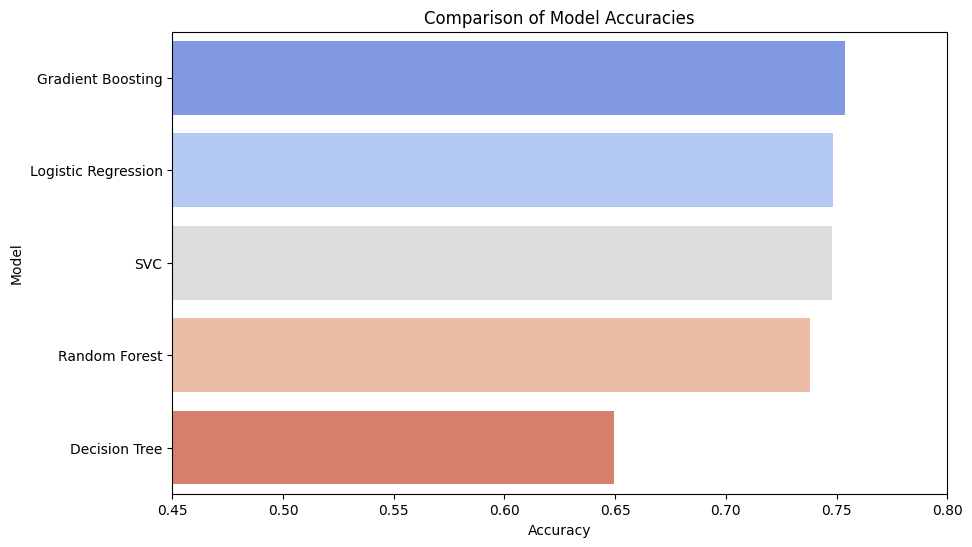

In [77]:
# Summarizing model performances in a DataFrame
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'Gradient Boosting']
accuracies = [accuracy_log_reg, accuracy_dec_tree, accuracy_rand_forest, accuracy_svc, accuracy_grad_boost]

# Creating a DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
}).sort_values(by='Accuracy', ascending=False)

# Visualizing the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_comparison, palette='coolwarm')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.45, 0.80)  # Adjusting limits for better visualization
plt.show()

In [69]:
model_comparison

,Model,Accuracy
4,Gradient Boosting,0.753589
0,Logistic Regression,0.748426
3,SVC,0.748143
2,Random Forest,0.738030
1,Decision Tree,0.649268


The comparison of model accuracies reveals the following rankings:

- Gradient Boosting: 75.35% accuracy
- Logistic Regression: 74.84% accuracy
- SVC (Support Vector Classifier): 74.81% accuracy
- Random Forest: 73.80% accuracy
- Decision Tree: 64.92% accuracy
  
The Gradient Boosting model leads in accuracy, indicating its effectiveness in handling the prediction task on this diabetes dataset. Logistic Regression and SVC also show competitive performance, highlighting their suitability for binary classification problems like this one. Random Forest and Decision Tree models, while slightly less accurate, still provide valuable insights, especially considering their interpretability and the different aspects of data they might capture.

#### h. Grid Search CV

In [70]:
# Defining a basic pipeline setup for each model
pipelines = {
    'lr': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(random_state=42))]),
    'dt': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier(random_state=42))]),
    'rf': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(random_state=42))]),
    'svc': Pipeline([('scaler', StandardScaler()), ('classifier', SVC(random_state=42))]),
    'gb': Pipeline([('scaler', StandardScaler()), ('classifier', GradientBoostingClassifier(random_state=42))])
}

# Parameter grids for each model
param_grids = {
    'lr': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'dt': {
        'classifier__max_depth': [None, 3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'rf': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'svc': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    'gb': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.5, 0.7, 1.0],
        'classifier__max_depth': [3, 5, 7]
    }
}

# Results storage
best_estimators = {}
cv_scores = {}

# Grid Search CV and Cross-Validation
for model_name in pipelines.keys():
    grid_search = GridSearchCV(pipelines[model_name], param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)  # No need to scale X_train here, pipeline takes care of it
    best_estimators[model_name] = grid_search.best_estimator_
    cv_scores[model_name] = cross_val_score(best_estimators[model_name], X_train, y_train, cv=5, scoring='accuracy').mean()

In [71]:
print("Best Estimators: \n", best_estimators)

Best Estimators: 
 {'lr': Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='liblinear'))]), 'dt': Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=4,
                                        random_state=42))]), 'rf': Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))]), 'svc': Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=0.1, random_state=42))]), 'gb': Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=200,
   

The Grid Search CV identified the best parameters and estimators for each model as follows:

- Logistic Regression: C=0.01, Penalty=l1, solver=liblinear.
- Decision Tree: Max Depth=10, Min Samples Leaf=4.
- Random Forest: Max Depth=10, Min Samples Split=10, Min Samples Leaf=4.
- SVC (Support Vector Classifier): C=1, Kernel='linear'
- Gradient Boosting: N_estimators=200.

#### i. Cross-Validation Scores

In [72]:
print("CV Score: \n", cv_scores)

CV Score: 
 {'lr': 0.7477233471700865, 'dt': 0.7338602852977326, 'rf': 0.7501635575987976, 'svc': 0.7498452786623289, 'gb': 0.7529573623041379}


The cross-validation scores, averaging the accuracy across 5 folds, for each model are:

- Logistic Regression: 74.77%
- Decision Tree: 73.86%
- Random Forest: 75.01%
- SVC: 74.98%
- Gradient Boosting: 75.29%

#### j. Choosing the Best Performing Model

Considering the cross-validation scores and the balance between model complexity and interpretability, Gradient Boosting emerges as the top model, closely followed by Random Forest and SVC. Gradient Boosting's leading performance is attributed to its ability to minimize both bias and variance, making it particularly effective for this dataset.

#### k. Model Deployment and Finalization

For deploying and finalizing the best model, which is the Gradient Boosting Classifier with n_estimators=50 and learning_rate=0.1, we will export the model using joblib, a Python library that provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently.

In [73]:
# Exporting the best model - Gradient Boosting Classifier
best_model = best_estimators['gb']
dump(best_model, 'best_gradient_boosting_model.joblib')

['best_gradient_boosting_model.joblib']

This exported model can then be loaded and used for making predictions in a different Python session or deployment environment.

#### l. Model Interpretation/Prediction and Visualization

Model interpretation involves understanding the model's decision-making process, which can be challenging for complex models like Gradient Boosting. However, one common approach is to use feature importance scores to understand which features the model finds most informative.

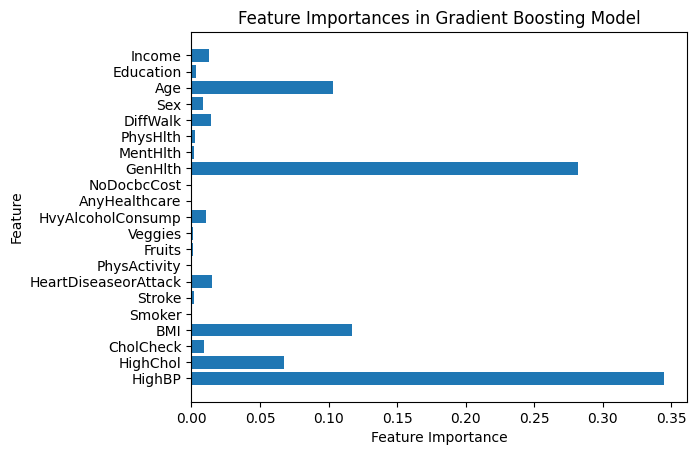

In [74]:
# Extracting feature importance
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Plotting feature importance
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boosting Model')
plt.show()

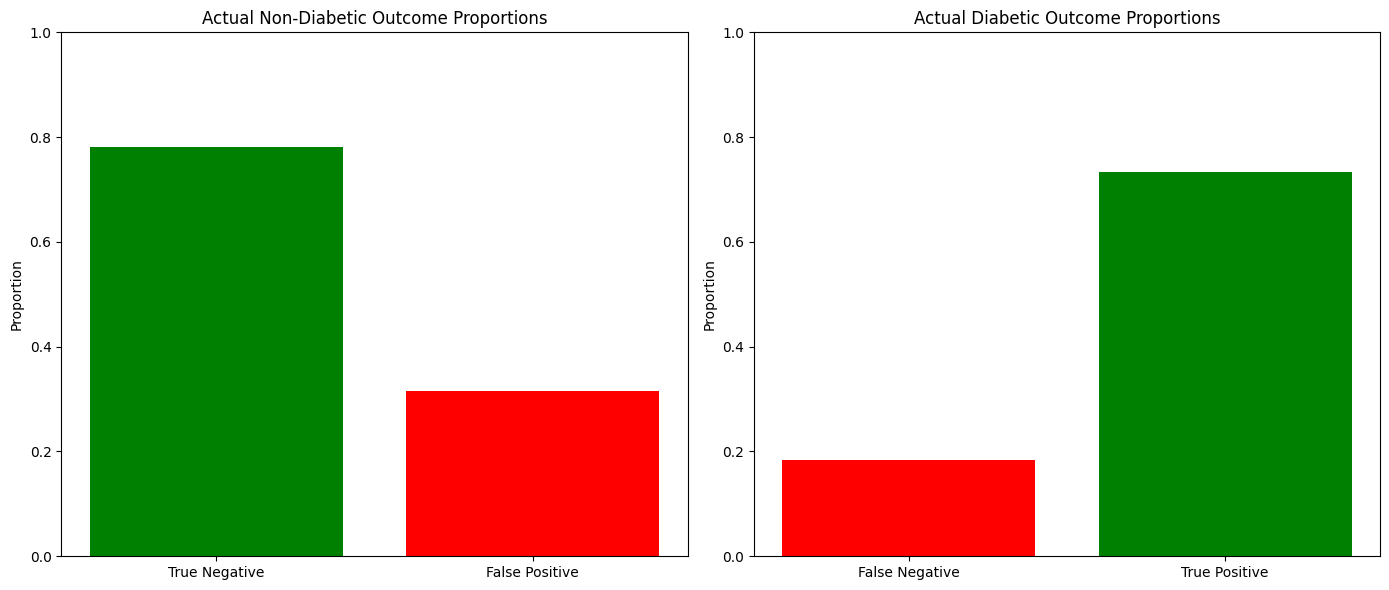

In [75]:
# Making predictions with the best model on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of diabetes

# Calculate metrics
TP = sum((y_test == 1) & (y_pred == 1))
TN = sum((y_test == 0) & (y_pred == 0))
FP = sum((y_test == 0) & (y_pred == 1))
FN = sum((y_test == 1) & (y_pred == 0))

# Proportions for actual non-diabetic
non_diabetic_proportions = [TN / (TN + FN), FP / (TN + FN)]

# Proportions for actual diabetic
diabetic_proportions = [FN / (TP + FP), TP / (TP + FP)]

# Set up the bar plot for non-diabetics
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # First subplot for non-diabetics
plt.bar(['True Negative', 'False Positive'], non_diabetic_proportions, color=['green', 'red'])
plt.title('Actual Non-Diabetic Outcome Proportions')
plt.ylabel('Proportion')
plt.ylim(0, 1)

# Set up the bar plot for diabetics
plt.subplot(1, 2, 2)  # Second subplot for diabetics
plt.bar(['False Negative', 'True Positive'], diabetic_proportions, color=['red', 'green'])
plt.title('Actual Diabetic Outcome Proportions')
plt.ylabel('Proportion')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

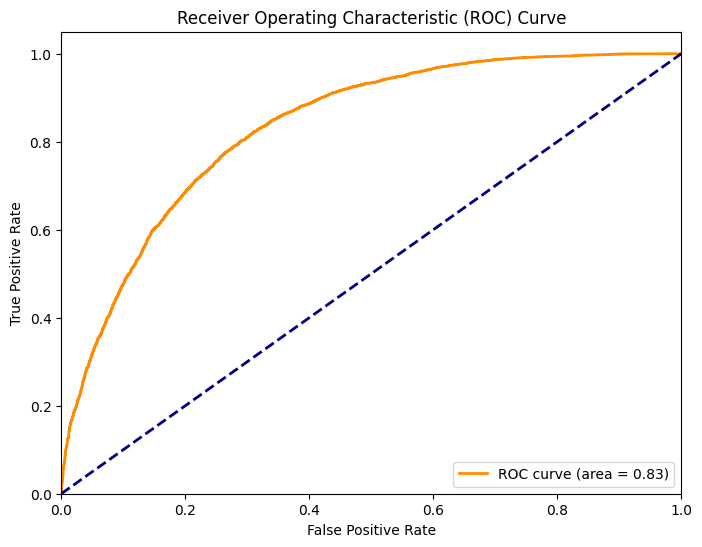

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### **Observations**:

1. **Feature Importances in Gradient Boosting Model**:
   - The plot presents the significance of each feature as evaluated by the gradient boosting model, indicating which factors most influence the prediction of diabetes.
   - The most impactful feature is `HighBP`, suggesting high blood pressure is a key predictor for diabetes within this model's context.
   - `HighChol` and `CholCheck` also show notable importance, indicating cholesterol levels and checks are significant in predicting diabetes.
   - On the lower end, `Income` and `Education` have the least importance, implying these socio-economic factors have minimal direct predictive power in this model.

2. **Actual Non-Diabetic and Diabetic Outcome Proportions**:

    - *Actual Non-Diabetic Outcome Proportions*:
       - The large green bar signifies a high true negative rate, where the model effectively identifies non-diabetic instances.
       - A smaller red bar indicates a lower false positive rate, suggesting fewer instances where the model incorrectly predicts diabetes in non-diabetic individuals.

    - *Actual Diabetic Outcome Proportions*:
       - The green bar represents a substantial true positive rate, pointing out the model's ability to identify diabetic cases correctly.
       - The red bar reflects the false negative rate, highlighting cases where the model failed to detect diabetes in individuals who have the condition.

    - Insights:
    
        - The model demonstrates a strong performance in correctly classifying non-diabetic individuals while maintaining a lower error rate in misclassifying non-diabetic instances as diabetic.
        - For diabetic predictions, the model has a good hit rate but also shows a significant rate of missed diabetic cases, which could be critical in a clinical setting.

3. **Receiver Operating Characteristic (ROC) Curve**:
   - The ROC curve showcases the model's performance in distinguishing between the two classes at various thresholds.
   - The AUC of 0.83 indicates a strong ability to differentiate between diabetic and non-diabetic individuals, with a higher value denoting better model performance.
   - The curve's progression towards the top-left corner reflects an effective trade-off between sensitivity (true positive rate) and specificity (1 - false positive rate), suggesting the model has good predictive power.

In [78]:
# Function to predict diabetes
def predict_outcome(high_bp, high_chol, chol_check, bmi, smoker, stroke, heart_disease_or_attack, phys_activity, fruits, veggies, hvy_alcohol_consump, any_healthcare, no_doc_bc_cost, gen_hlth, ment_hlth, phys_hlth, diff_walk, sex, age, education, income, model):
    # Create a numpy array from the input data
    new_patient_data = np.array([[high_bp, high_chol, chol_check, bmi, smoker, stroke, heart_disease_or_attack, phys_activity, fruits, veggies, hvy_alcohol_consump, any_healthcare, no_doc_bc_cost, gen_hlth, ment_hlth, phys_hlth, diff_walk, sex, age, education, income]])

    # Predict the probability of the outcome using the provided model
    probability_of_outcome = model.predict_proba(new_patient_data)[0, 1]
    
    # Determine the diagnosis based on the predicted probability
    if probability_of_outcome >= 0.5:
        print("Higher risk of diabetes-related outcome")
    else:
        print("Lower risk of diabetes-related outcome")
    return probability_of_outcome

In [79]:
# patient data
high_bp_value = 0.0
high_chol_value = 1.0
chol_check_value = 1.0
bmi_value = 35.0
smoker_value = 0.0
stroke_value = 0.0
heart_disease_or_attack_value = 0.0
phys_activity_value = 1.0
fruits_value = 1.0
veggies_value = 1.0
hvy_alcohol_consump_value = 0.0
any_healthcare_value = 1.0
no_doc_bc_cost_value = 0.0
gen_hlth_value = 3.0
ment_hlth_value = 0.0
phys_hlth_value = 0.0
diff_walk_value = 0.0
sex_value = 0.0
age_value = 11.0
education_value = 4.0
income_value = 2.0


In [80]:
# Make a prediction with best model
best_model = load("best_gradient_boosting_model.joblib") # Path of your model
predicted_probability = predict_outcome(high_bp=high_bp_value, 
                                        high_chol=high_chol_value, 
                                        chol_check=chol_check_value, 
                                        bmi=bmi_value, 
                                        smoker=smoker_value, 
                                        stroke=stroke_value, 
                                        heart_disease_or_attack=heart_disease_or_attack_value, 
                                        phys_activity=phys_activity_value, 
                                        fruits=fruits_value, 
                                        veggies=veggies_value, 
                                        hvy_alcohol_consump=hvy_alcohol_consump_value, 
                                        any_healthcare=any_healthcare_value, 
                                        no_doc_bc_cost=no_doc_bc_cost_value, 
                                        gen_hlth=gen_hlth_value, 
                                        ment_hlth=ment_hlth_value, 
                                        phys_hlth=phys_hlth_value, 
                                        diff_walk=diff_walk_value, 
                                        sex=sex_value, 
                                        age=age_value, 
                                        education=education_value, 
                                        income=income_value,
                                        model=best_model)

Higher risk of diabetes-related outcome


In [81]:
print(f"The predicted probability of diabetes is: {predicted_probability:.2f}")

The predicted probability of diabetes is: 0.76


#### m. Limitations and Challenges

- Data Quality and Quantity: The performance of the models is highly dependent on the quality and quantity of the data. Missing values, outliers, or imbalanced datasets can significantly affect outcomes.
- Model Complexity: Models like Gradient Boosting are complex and can be challenging to interpret, which might limit their applicability in scenarios where understanding the decision process is crucial.
- Computational Resources: Grid Search CV and training complex models require significant computational resources, especially with large datasets or extensive parameter grids.
- Generalization: There's always a risk that a model performs well on the training dataset but fails to generalize to new, unseen data.

#### n. Conclusion

This analysis demonstrated the process of exploring, preparing, and modeling a diabetes dataset with various machine learning techniques, from simple models like Logistic Regression to more complex ones like Gradient Boosting. Gradient Boosting emerged as the best-performing model through a process of rigorous evaluation and parameter tuning. However, successful deployment and use of machine learning models require careful consideration of their limitations, the quality of input data, and the need for ongoing validation against new data to ensure their predictions remain accurate and reliable over time. This project underscores the importance of a thorough understanding of both the data and the modeling techniques in developing effective predictive models.

---
## END OF PROJECT
---